In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [14]:
X,y = make_moons(n_samples=1000,noise=0.2)

In [15]:
df = {'x1':X[:,0],'x2':X[:,1],'y':y}

In [16]:
data = pd.DataFrame(df)

In [17]:
data.head()

,x1,x2,y
0,1.398374,-0.229170,1
1,-0.315419,0.993672,0
2,-0.840091,0.046325,0
3,2.005330,0.584463,1
4,0.354150,0.765061,0


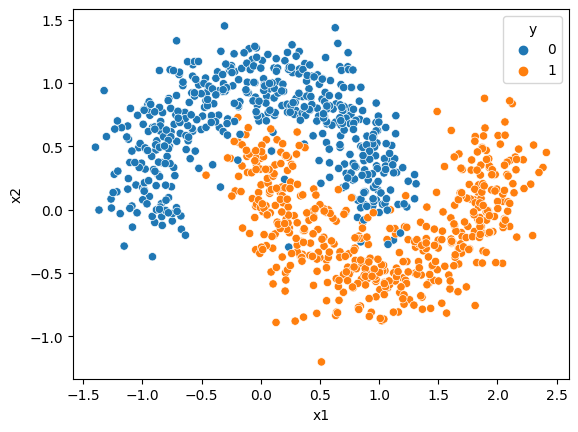

In [18]:
sns.scatterplot(x='x1',y='x2',data = data , hue='y')
plt.show()

In [20]:
x_a = data.iloc[: , : -1 ]
y_a = data["y"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test , y_train , y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)*100 , dt.score(X_test,y_test)*100

(100.0, 93.5)

In [25]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100 , gnb.score(X_test,y_test)*100

(86.75, 80.5)

In [26]:
sc = SVC()
sc.fit(X_train,y_train)
sc.score(X_train,y_train)*100 , sc.score(X_test,y_test)*100

(97.5, 96.5)

In [27]:
from sklearn.ensemble import VotingClassifier

In [28]:
li = [('dt1',DecisionTreeClassifier()),('svm1',SVC()),('gnb1',GaussianNB())]

In [30]:
vc = VotingClassifier(li)
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('svm1', SVC()),
                             ('gnb1', GaussianNB())])

In [31]:
vc.score(X_train,y_train)*100 , vc.score(X_test,y_test)*100

(98.375, 95.5)

In [32]:
prd = {'dt': dt.predict(X_test),'svm':sc.predict(X_test),'gnb':gnb.predict(X_test),"vc":vc.predict(X_test)}

In [33]:
final_prediction = pd.DataFrame(prd)

In [34]:
final_prediction

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
195,0,0,0,0
196,1,1,0,1
197,1,1,1,1
198,1,1,1,1
